# Rede Neural Convolucional com Dataset CIFAR-10

## Importação de bibliotecas necessárias

In [ ]:
!pip install keras

In [ ]:
!pip install h5py
!pip install typing-extensions
!pip install wheel

In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully

In [ ]:
!pip install keras_cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 44.1 MB/s eta 0:00:00


In [ ]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 71.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 54.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
#Importando libs essenciais
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from keras.layers import BatchNormalization
from keras.layers  import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import ImageDataGenerator
# from keras.wrappers import KerasClassifier
from scikeras.wrappers import KerasClassifier
from keras_cv.layers import Grayscale

## Separando dados para treinamentos

### Leitura de dataset

In [ ]:
#Separando dados para treinamentos
seed = 10
np.random.seed(seed)
(X_treinamento, y_treinamento),(X_teste, y_teste) =  cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


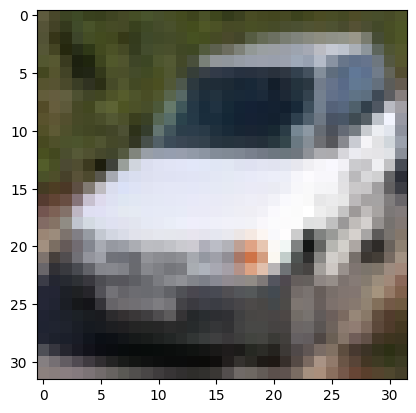

In [ ]:
#Mostrando imagem
plt.imshow(X_treinamento[46])

### Conversão das imagens em escala de cinza

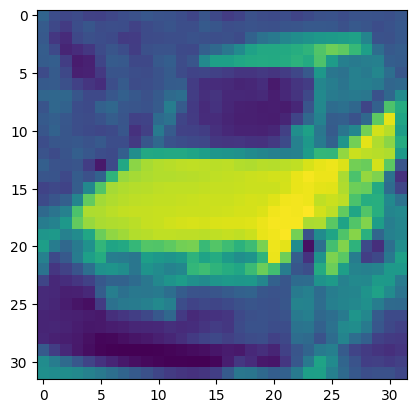

In [ ]:
# Convertendo imagens
to_grayscale = Grayscale()
previsores_treinamento = to_grayscale(X_treinamento)
previsores_teste = to_grayscale(X_teste)
previsores_treinamento = np.array(previsores_treinamento)
previsores_teste = np.array(previsores_teste)
plt.imshow(previsores_treinamento[46])

In [ ]:
print(previsores_treinamento.shape)
print(previsores_teste.shape)

(50000, 32, 32, 1)
(10000, 32, 32, 1)


### Tratando dados de pixels para uma escala de 0-1

In [ ]:
#Tratando dados de pixels para uma escala de 0-1
previsores_treinamento /= 255
previsores_teste /= 255

### Convertendo classes

In [ ]:
#Convertendo classes
classe_treinamento = to_categorical(y_treinamento, 10)
classe_teste = to_categorical(y_teste, 10)

## Criação de Augumentation

In [ ]:
# Augumentation
gerador_treinamento = ImageDataGenerator(rotation_range=7,
                                         horizontal_flip= True,
                                         shear_range = 0.2,
                                         height_shift_range = 0.07,
                                         zoom_range=0.2)

gerador_teste = ImageDataGenerator()

base_treinamento = gerador_treinamento.flow(previsores_treinamento, classe_treinamento, batch_size= 128)
base_teste = gerador_teste.flow(previsores_teste, classe_teste, batch_size= 128)

In [ ]:
print(base_treinamento.x.shape)
print(base_teste.x.shape)
print(classe_treinamento.shape)
print(classe_teste.shape)
print(previsores_treinamento.shape)
print(previsores_teste.shape)

(50000, 32, 32, 1)
(10000, 32, 32, 1)
(50000, 10)
(10000, 10)
(50000, 32, 32, 1)
(10000, 32, 32, 1)


## Criação da Rede Neural Convolucional

In [ ]:
#Iniciar rede convulacional
def criarRede(optimizer='adam', activation='relu'):
  classificador = Sequential()
  classificador.add(Conv2D(32, (4,4), input_shape=(32,32,1),
                          activation = "relu")) #Criação do mapa de características
  classificador.add(BatchNormalization()) #Normalização dos dados
  classificador.add(MaxPooling2D(pool_size=(2,2))) #Realização do MaxPooling para pegar as principais características


  classificador.add(Conv2D(32, (3,3),strides=2, activation = "relu")) #Criação do mapa de características
  classificador.add(BatchNormalization()) #Normalização dos dados
  classificador.add(MaxPooling2D(pool_size=(2,2))) #Realização do MaxPooling para pegar as principais características


  classificador.add(Flatten()) #Normalizar para uma entrada comum na rede neural densa
  classificador.add(Dense(units=128, activation = "relu" ))
  classificador.add(Dropout(0.2))
  classificador.add(Dense(units=256, activation = "relu" ))
  classificador.add(Dropout(0.2))
  classificador.add(Dense(units=10, activation = "softmax" ))
  classificador.compile(loss = 'categorical_crossentropy',
                        optimizer = 'adam', metrics = ['accuracy'])
  return classificador

In [ ]:
# Labels do CIFAR 10
labels = 'airplane automobile bird cat deer dog frog horse ship truck'.upper().split(' ')
labels

['AIRPLANE',
 'AUTOMOBILE',
 'BIRD',
 'CAT',
 'DEER',
 'DOG',
 'FROG',
 'HORSE',
 'SHIP',
 'TRUCK']

## Inicialização de treinamentos e testes

### Instanciando rede neural

In [ ]:
classificador = criarRede()

### Usando dados originais em escala de cinza

In [ ]:
# Usando dados originais em escala de cinza
classificador.fit(previsores_treinamento, classe_treinamento, batch_size= 128, epochs = 20)
precisao = classificador.evaluate(previsores_teste, classe_teste)
print(f'Precisão usando dados originais em escala de cinza: {precisao}')

Epoch 1/20
391/391 [==============================] - 9s 6ms/step - loss: 1.7199 - accuracy: 0.3826
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 1.3709 - accuracy: 0.5154
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 1.2174 - accuracy: 0.5730
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 1.1190 - accuracy: 0.6077
Epoch 5/20
391/391 [==============================] - 2s 6ms/step - loss: 1.0453 - accuracy: 0.6362
Epoch 6/20
391/391 [==============================] - 2s 6ms/step - loss: 0.9917 - accuracy: 0.6528
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 0.9449 - accuracy: 0.6695
Epoch 8/20
391/391 [==============================] - 2s 5ms/step - loss: 0.9098 - accuracy: 0.6829
Epoch 9/20
391/391 [==============================] - 2s 5ms/step - loss: 0.8708 - accuracy: 0.6939
Epoch 10/20
391/391 [==============================] - 2s 5ms/step - loss: 0.8435 - accuracy: 0.7051

1/1 [==============================] - 0s 194ms/step
Previsão: 0 Label Prevista: AIRPLANE
Classe real: 0 Label Real: AIRPLANE
Resultado: ACERTOU


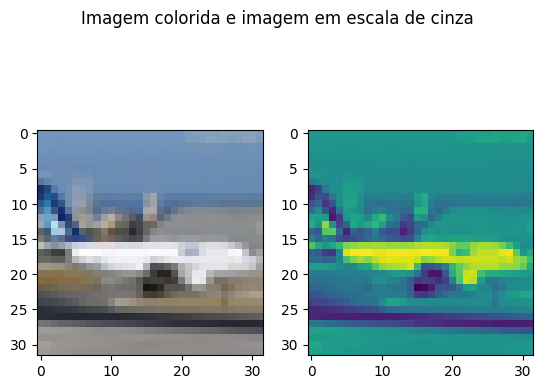

In [ ]:
index =  90
imagem_teste = np.expand_dims(previsores_teste[index], axis =0)
previsao = classificador.predict(imagem_teste)
previsao = np.argmax(previsao, axis=-1)[0]
classe_real = preds_classes = np.argmax(classe_teste[index], axis=-1)
fig, axs = plt.subplots(1,2)
fig.suptitle('Imagem colorida e imagem em escala de cinza')
axs[0].imshow(X_teste[index])
axs[1].imshow(previsores_teste[index])
resultado = 'ACERTOU' if previsao==classe_real else 'ERROU'
print(f'Previsão: {previsao} Label Prevista: {labels[previsao]}\nClasse real: {classe_real} Label Real: {labels[classe_real]}\nResultado: {resultado}')

### Validação Cruzada

In [ ]:
#Validação cruzada
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = seed)

resultados = []

classificador = criarRede()
for index_treinamento, index_teste in kfold.split(previsores_treinamento,
                                                       np.zeros(shape = (classe_treinamento.shape[0], 1))):
  classificador.fit(previsores_treinamento[index_treinamento], classe_treinamento[index_treinamento],
                    batch_size= 128, epochs = 15)
  precisao = classificador.evaluate(previsores_treinamento[index_teste], classe_treinamento[index_teste])
  resultados.append(precisao[1])

Epoch 1/15
352/352 [==============================] - 8s 13ms/step - loss: 1.7244 - accuracy: 0.3797
Epoch 2/15
352/352 [==============================] - 3s 9ms/step - loss: 1.3845 - accuracy: 0.5083
Epoch 3/15
352/352 [==============================] - 4s 10ms/step - loss: 1.2349 - accuracy: 0.5695
Epoch 4/15
352/352 [==============================] - 4s 12ms/step - loss: 1.1452 - accuracy: 0.6003
Epoch 5/15
352/352 [==============================] - 3s 9ms/step - loss: 1.0684 - accuracy: 0.6276
Epoch 6/15
352/352 [==============================] - 2s 5ms/step - loss: 1.0131 - accuracy: 0.6465
Epoch 7/15
352/352 [==============================] - 2s 5ms/step - loss: 0.9686 - accuracy: 0.6616
Epoch 8/15
352/352 [==============================] - 2s 5ms/step - loss: 0.9249 - accuracy: 0.6772
Epoch 9/15
352/352 [==============================] - 2s 5ms/step - loss: 0.8972 - accuracy: 0.6856
Epoch 10/15
352/352 [==============================] - 2s 7ms/step - loss: 0.8662 - accuracy: 0.6

In [ ]:
resultados =  np.array(resultados)
mediaCross  = resultados.mean()
print(mediaCross)

0.7645600020885468


1/1 [==============================] - 0s 146ms/step
Previsão: 6 Label Prevista: FROG
Classe real: 6 Label Real: FROG
Resultado: ACERTOU


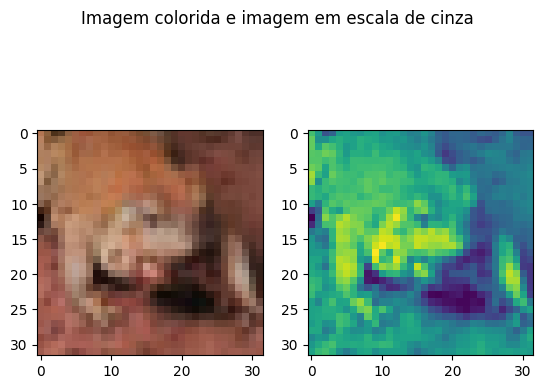

In [ ]:
index =  5
imagem_teste = np.expand_dims(previsores_teste[index], axis =0)
previsao = classificador.predict(imagem_teste)
previsao = np.argmax(previsao, axis=-1)[0]
classe_real = preds_classes = np.argmax(classe_teste[index], axis=-1)
fig, axs = plt.subplots(1,2)
fig.suptitle('Imagem colorida e imagem em escala de cinza')
axs[0].imshow(X_teste[index])
axs[1].imshow(previsores_teste[index])
resultado = 'ACERTOU' if previsao==classe_real else 'ERROU'
print(f'Previsão: {previsao} Label Prevista: {labels[previsao]}\nClasse real: {classe_real} Label Real: {labels[classe_real]}\nResultado: {resultado}')

### Treinamento e teste com Augumentation

In [ ]:
classificador = criarRede()
classificador.fit(base_treinamento,
                  steps_per_epoch= base_treinamento.x.shape[0]/base_treinamento.batch_size,
                  epochs = 20,
                  validation_data=base_teste,
                  validation_steps=base_teste.x.shape[0]/base_teste.batch_size)
precisao = classificador.evaluate(base_teste.x, base_teste.y)
print(f'Precisão usando dados originais em escala de cinza: {precisao}')

Epoch 1/20
390/390 [==============================] - 19s 42ms/step - loss: 1.8011 - accuracy: 0.3533 - val_loss: 2.2139 - val_accuracy: 0.2419
Epoch 2/20
390/390 [==============================] - 16s 42ms/step - loss: 1.5303 - accuracy: 0.4591 - val_loss: 1.7576 - val_accuracy: 0.3992
Epoch 3/20
390/390 [==============================] - 17s 45ms/step - loss: 1.4069 - accuracy: 0.5055 - val_loss: 1.4803 - val_accuracy: 0.4793
Epoch 4/20
390/390 [==============================] - 16s 41ms/step - loss: 1.3266 - accuracy: 0.5344 - val_loss: 1.6548 - val_accuracy: 0.4549
Epoch 5/20
390/390 [==============================] - 16s 41ms/step - loss: 1.2622 - accuracy: 0.5611 - val_loss: 1.1611 - val_accuracy: 0.5963
Epoch 6/20
390/390 [==============================] - 16s 42ms/step - loss: 1.2104 - accuracy: 0.5742 - val_loss: 1.1096 - val_accuracy: 0.6131
Epoch 7/20
390/390 [==============================] - 18s 46ms/step - loss: 1.1761 - accuracy: 0.5893 - val_loss: 1.4411 - val_accuracy:

1/1 [==============================] - 0s 18ms/step
Previsão: 9 Label Prevista: TRUCK
Classe real: 9 Label Real: TRUCK
Resultado: ACERTOU


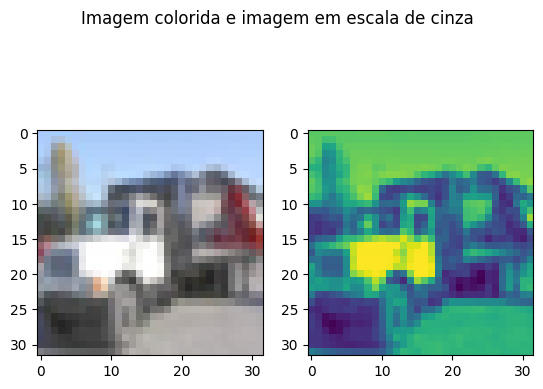

In [ ]:
index =  45
imagem_teste = np.expand_dims(previsores_teste[index], axis =0)
previsao = classificador.predict(imagem_teste)
previsao = np.argmax(previsao, axis=-1)[0]
classe_real = preds_classes = np.argmax(classe_teste[index], axis=-1)
fig, axs = plt.subplots(1,2)
fig.suptitle('Imagem colorida e imagem em escala de cinza')
axs[0].imshow(X_teste[index])
axs[1].imshow(previsores_teste[index])
resultado = 'ACERTOU' if previsao==classe_real else 'ERROU'
print(f'Previsão: {previsao} Label Prevista: {labels[previsao]}\nClasse real: {classe_real} Label Real: {labels[classe_real]}\nResultado: {resultado}')

# Busca em grade

In [ ]:
# Parâmetros escolhiddos para ajustar
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'batch_size': [128, 256],
    'epochs': [10, 15]
}

In [ ]:
!pip install scikeras
import scikeras
from scikeras.wrappers import KerasClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 29.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.


ImportError: cannot import name '_get_container_adapter' from 'sklearn.utils._set_output' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py)

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold


In [ ]:
# Create KerasClassifier with the wrapper build_fn
classificador = KerasClassifier(build_fn=criarRede, verbose=0, activation='relu')

# Set up KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# Configure GridSearchCV
grid = GridSearchCV(estimator=classificador, param_grid=param_grid, scoring='accuracy', cv=kfold)

# Fit the model
grid_result = grid.fit(previsores_treinamento, classe_treinamento)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequ

In [ ]:
print(classificador.get_params().keys())

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'activation', 'class_weight'])


In [ ]:
# Exibindo os melhores parâmetros e a melhor precisão
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

Melhor: 0.620240 usando {'batch_size': 256, 'epochs': 15, 'optimizer': 'adam'}


In [ ]:
# Exiba os resultados de todas as combinações de parâmetros
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) com: %r" % (mean, std, param))

0.608540 (0.032058) com: {'batch_size': 128, 'epochs': 10, 'optimizer': 'adam'}
0.603460 (0.042699) com: {'batch_size': 128, 'epochs': 10, 'optimizer': 'rmsprop'}
0.616980 (0.024757) com: {'batch_size': 128, 'epochs': 15, 'optimizer': 'adam'}
0.608660 (0.044798) com: {'batch_size': 128, 'epochs': 15, 'optimizer': 'rmsprop'}
0.611120 (0.047558) com: {'batch_size': 256, 'epochs': 10, 'optimizer': 'adam'}
0.564180 (0.056226) com: {'batch_size': 256, 'epochs': 10, 'optimizer': 'rmsprop'}
0.620240 (0.019505) com: {'batch_size': 256, 'epochs': 15, 'optimizer': 'adam'}
0.589460 (0.067430) com: {'batch_size': 256, 'epochs': 15, 'optimizer': 'rmsprop'}


In [ ]:
# Média dos resultados
media = means.mean()
std = stds.mean()

print(f"Acurácia média: {media}\nDesvio padrão médio: {std}")

Acurácia média: 0.6028300000000001
Desvio padrão médio: 0.041878887058132516


# Gráficos

In [14]:
import matplotlib.pyplot as plt

means = [#Apagar depois
0.608540, 0.603460, 0.616980, 0.608660, 0.611120, 0.564180, 0.620240, 0.589460]

stds = [
0.032058, 0.042699, 0.024757, 0.044798, 0.047558, 0.056226, 0.019505, 0.067430
]

In [17]:
joined = list(zip(means, stds))
print(joined)
print("---")
joined = sorted(joined)


[(0.60854, 0.032058), (0.60346, 0.042699), (0.61698, 0.024757), (0.60866, 0.044798), (0.61112, 0.047558), (0.56418, 0.056226), (0.62024, 0.019505), (0.58946, 0.06743)]
---


Text(0.5, 1.0, 'Acurácia Média do Grid Search Ordenado')

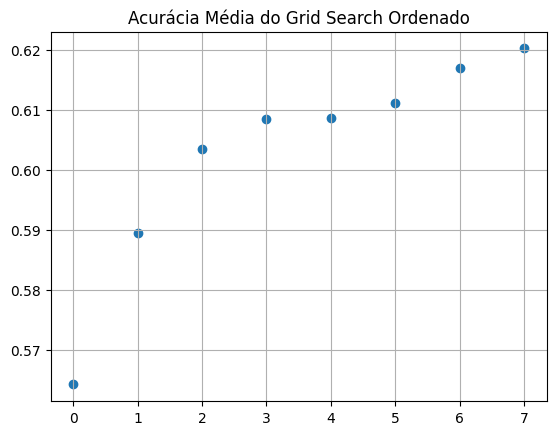

In [18]:
plt.scatter(y = [i[0] for i in joined], x = [i for i in range(len(means))])
plt.grid()
plt.title("Acurácia Média do Grid Search Ordenado")

Text(0.5, 1.0, 'Desvio Padrão Médio do Grid Search')

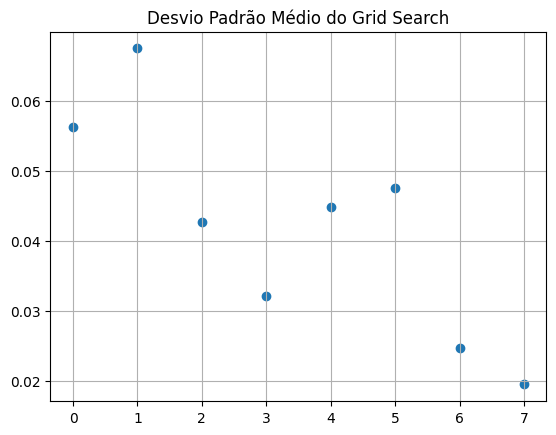

In [20]:
plt.scatter(y = [i[1] for i in joined], x = [i for i in range(len(stds))])
plt.grid()
plt.title("Desvio Padrão Médio do Grid Search")